In [1]:
import numpy as np
import matplotlib.pyplot as plt
import LMC
import noise

pi = np.pi

ModuleNotFoundError: No module named 'noise'

In [ ]:
###### create three systems: cold, warm, and hot for dynamical "hotness"

NPL = 4

# radius
Rc = np.array([1.6, 1.5, 1.7, 1.4])
Rw = np.array([1.1, 2.0, 3.7, 4.4])
Rh = np.array([1.5, 0.8, 9.1, 6.9])

# log(period)
logPc = np.array([1,2,3,4])
logPw = np.array([1,2.2,2.8,3.9])
logPh = np.array([1,1.6,2.5,4.0])


# inclinations
Ic = np.array([0.0,0.1,-0.1,0])
Iw = np.array([0.0,4.2,3.7,-3.1])
Ih = np.array([0.0,-8.0,12.2,2.1])


plt.figure()
plt.hlines([1,2,3],0.7,4.3, linestyle='--', color='lightgrey', zorder=0)
plt.scatter(logPc, 1+np.sin(Ic*pi/180), s=Rc*100, c='lightgrey', edgecolor='k')
plt.scatter(logPw, 2+np.sin(Iw*pi/180), s=Rw*100, c='lightgrey', edgecolor='k')
plt.scatter(logPh, 3+np.sin(Ih*pi/180), s=Rh*100, c='lightgrey', edgecolor='k')
plt.yticks([])
plt.ylim(0.5,3.5)
plt.xlabel('log(P)', fontsize=16)
plt.xticks([])
plt.xlim(0.8,4.2)

plt.savefig('/Users/research/projects/maiasaurus/Figures/example_systems.pdf')
plt.show()

# LMC curve

In [2]:
prob_vector = np.vstack([np.ones(1000),1+np.arange(1000)/25]).T

FileNotFoundError: [Errno 2] No such file or directory: '/Users/research/projects/maiasaurus/Figures/CHD_curve.pdf'

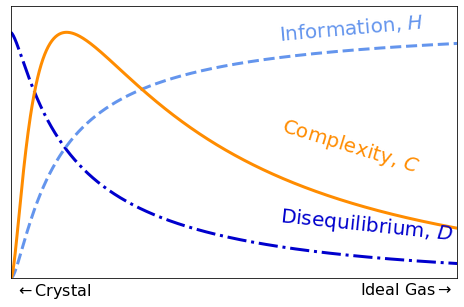

In [3]:
# make plot of LMC metrics
# note that things are a bit wonky/backwards so as to match the figure in LMC2010

H = np.zeros(1000)
D = np.zeros(1000)
C = np.zeros(1000)
x = np.linspace(0,1,1000)

for i in range(1000):
    p = prob_vector[i]/np.sum(prob_vector[i])
    H[i] = LMC.H(p)
    D[i] = LMC.D(p)
    C[i] = LMC.C(p)

    
    
H = H*np.exp(-x)*0.95
C = C*np.exp(-x)
C = C/C.max()*0.95
    
    
plt.figure(figsize=(8,5))
plt.plot(x, H, c='mediumblue', lw=3, ls='-.')
plt.text(0.60,0.15, r'Disequilibrium, $D$', fontsize=20, color='mediumblue', rotation=-6)
plt.plot(x, D, c='cornflowerblue', lw=3, ls='--')
plt.text(0.60,0.92, r'Information, $H$', fontsize=20, color='cornflowerblue', rotation=5)
plt.plot(x, C, c='darkorange', lw=3)
plt.text(0.60,0.41, r'Complexity, $C$', fontsize=20, color='darkorange', rotation=-17)
plt.xticks([])
plt.text(0.01,-0.01, r'$\leftarrow$Crystal', fontsize=16, ha='left', va='top')
plt.text(0.99,-0.01, r'Ideal Gas$\rightarrow$', fontsize=16, ha='right', va='top')
plt.xlim(0,1)
plt.yticks([])
plt.ylim(0,1.05)
plt.savefig('/Users/research/projects/maiasaurus/Figures/CHD_curve.pdf', bbox_inches='tight')
plt.show()

# SDL curve

FileNotFoundError: [Errno 2] No such file or directory: '/Users/research/Desktop/Figures/SDL_curve.pdf'

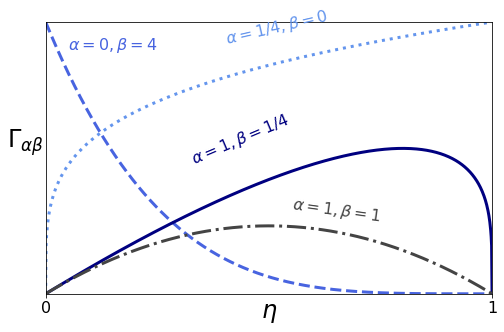

In [5]:
# make plot of SDL complexity

S = np.linspace(0,1,1000)

def Gamma(S,a,B):
    return S**a*(1-S)**B


S11 = Gamma(S,1,1)
S04 = Gamma(S,0,4)
S20 = Gamma(S,1/4,0)
S12 = Gamma(S,1,1/4)

plt.figure(figsize=(8,5))
plt.plot(S, S20, 'cornflowerblue', ls=':', lw=3)
plt.plot(S, S04, '#4864e0', ls='--', lw=3)
plt.plot(S, S12, 'navy', ls='-', lw=3)
plt.plot(S, S11, '#444444', ls='-.', lw=3)

plt.text(0.4,0.92,r'$\alpha=1/4, \beta=0$', color='cornflowerblue', fontsize=16, rotation=13)
plt.text(0.05,0.9,r'$\alpha=0, \beta=4$', color='#4864e0', fontsize=16)
plt.text(0.32,0.48,r'$\alpha=1, \beta=1/4$', color='navy', fontsize=16, rotation=23)
plt.text(0.55,0.27,r'$\alpha=1, \beta=1$', color='#444444', fontsize=16, rotation=-8)


plt.xlim(0,1)
plt.xticks([0,1], fontsize=16)
plt.xlabel(r'$\eta$', fontsize=24, labelpad=-15)
plt.ylim(0,1)
plt.yticks([])
plt.ylabel(r'$\Gamma_{\alpha\beta}$', fontsize=24, rotation=0, labelpad=20)
plt.savefig('/Users/research/Desktop/Figures/SDL_curve.pdf', bbox_inches='tight')
plt.show()

# 2D images illustrating complexity

In [6]:
N = 64

order = (np.arange(12*12)%2).reshape((12,12))
order[::2] = np.roll(order[::2],1)

random = np.random.randint(0,2,N*N).reshape((N,N))

In [7]:
shape = (N,N)
scale = N/3
octaves = 6
persistence = 0.5
lacunarity = 2.0

world3 = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world3[i][j] = noise.pnoise2(i/scale, j/scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity)

scale = N/12
world12 = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world12[i][j] = noise.pnoise2(i/scale, j/scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity)
       
        

fractal = ((world3)+(world12)) > 0
        
plt.figure()
plt.imshow(fractal, cmap='binary')
plt.show()

NameError: name 'noise' is not defined

NameError: name 'fractal' is not defined

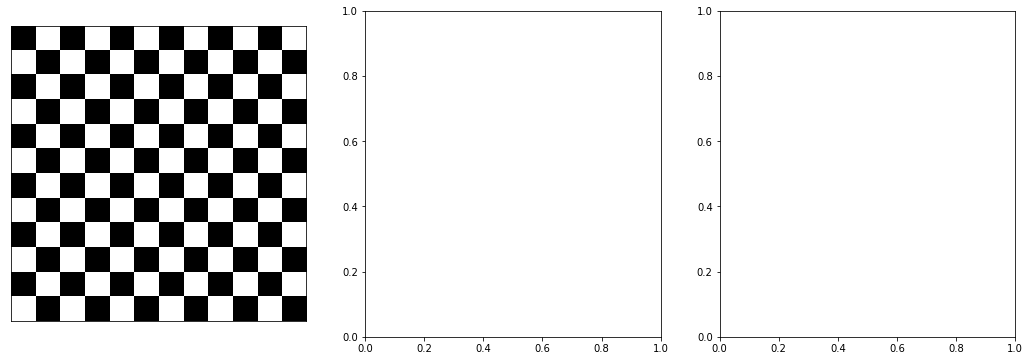

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
axes[0].imshow(order, cmap='binary')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].imshow(fractal, cmap='binary')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[2].imshow(random, cmap='binary')
axes[2].set_xticks([])
axes[2].set_yticks([])
fig.tight_layout()

plt.savefig('/Users/research/Desktop/Figures/complexity_examples.pdf')

  H    D     C
4 0.92 0.111 [0.334]
5 0.95 0.062 [0.204]
6 0.96 0.04 [0.138]
7 0.97 0.028 [0.099]


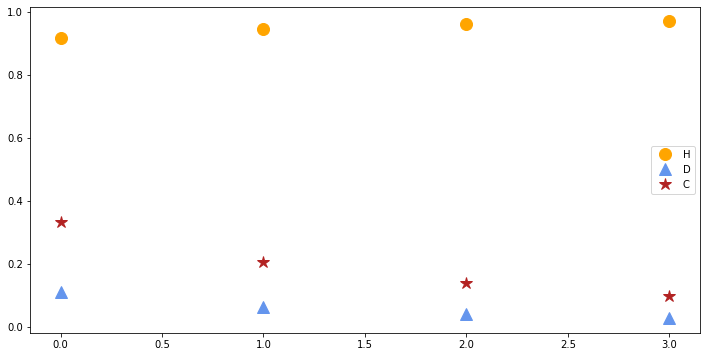

In [9]:
# make some evenly-spaced systems with one planet missing
p_start = 2.0**np.arange(10)

p4 = p_start[[0,2,3]]
p5 = p_start[[0,2,3,4]]
p6 = p_start[[0,2,3,4,5]]
p7 = p_start[[0,2,3,4,5,6]]

pcount = [4,5,6,7]
plist  = [p4,p5,p6,p7]


# calculate p*
for i, p in enumerate(plist):
    plist[i] = np.log(p[1:]/p[:-1]) / (np.log(p.max()/p.min()))

    
# calculate LMC metrics
Hlist = []
Dlist = []
Clist = []

for i, p in enumerate(plist):
    Hlist.append(LMC.H(p, normalize_output=True))
    Dlist.append(LMC.D(p, normalize_output=True))
    Clist.append(LMC.C(p, normalize_output=True))
    

print('  H    D     C')
for i, p in enumerate(plist):
    print(pcount[i], Hlist[i].round(2), Dlist[i].round(3), Clist[i].round(3))
    
    
plt.figure(figsize=(12,6))
plt.plot(Hlist, 'o', ms=12, c='orange', label='H')
plt.plot(Dlist, '^', ms=12, c='cornflowerblue', label='D')
plt.plot(Clist, '*', ms=12, c='firebrick', label='C')
plt.legend()
plt.show()

  H    D     C
2 1.0 0.0 [0.]
3 0.98 0.027 [0.09]
4 0.95 0.062 [0.204]
5 0.92 0.094 [0.297]


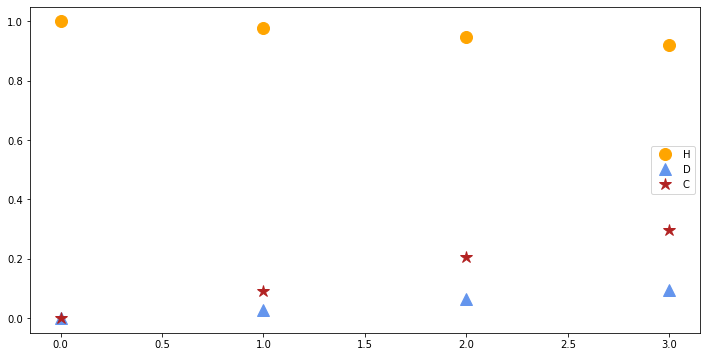

In [10]:
# make some 4-planets systems w/ different sized gaps
p2 = np.array([1,2,4,8])
p3 = np.array([1,2,4,12])
p4 = np.array([1,2,4,16])
p5 = np.array([1,2,4,20])

pcount = [2,3,4,5]
plist  = [p2,p3,p4,p5]


# calculate p*
for i, p in enumerate(plist):
    plist[i] = np.log(p[1:]/p[:-1]) / (np.log(p.max()/p.min()))

    
# calculate LMC metrics
Hlist = []
Dlist = []
Clist = []

for i, p in enumerate(plist):
    Hlist.append(LMC.H(p, normalize_output=True))
    Dlist.append(LMC.D(p, normalize_output=True))
    Clist.append(LMC.C(p, normalize_output=True))
    

print('  H    D     C')
for i, p in enumerate(plist):
    print(pcount[i], Hlist[i].round(2), Dlist[i].round(3), Clist[i].round(3))
    
    
plt.figure(figsize=(12,6))
plt.plot(Hlist, 'o', ms=12, c='orange', label='H')
plt.plot(Dlist, '^', ms=12, c='cornflowerblue', label='D')
plt.plot(Clist, '*', ms=12, c='firebrick', label='C')
plt.legend()
plt.show()